In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

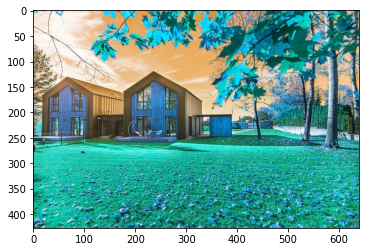

In [11]:
my_image = cv2.imread('house.jpg')
plt.imshow(my_image)

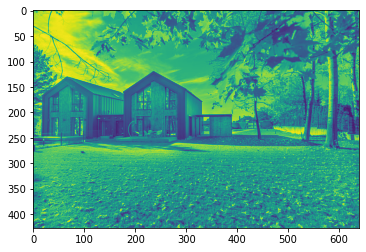

In [12]:
gray_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image)

In [13]:
# input image, #points, quality level (0-1), min euclidean dist. between detected points
corners = cv2.goodFeaturesToTrack(gray_image, 25, 0.01, 10)
corners


array([[[266., 244.]],

       [[345., 210.]],

       [[335., 210.]],

       [[278., 243.]],

       [[ 31.,  92.]],

       [[352., 193.]],

       [[ 46., 127.]],

       [[558., 231.]],

       [[ 29., 105.]],

       [[634., 228.]],

       [[ 94., 217.]],

       [[ 20., 255.]],

       [[127., 212.]],

       [[261., 386.]],

       [[ 82., 234.]],

       [[262., 176.]],

       [[419., 104.]],

       [[617., 239.]],

       [[608., 249.]],

       [[331., 179.]],

       [[208., 241.]],

       [[  3., 237.]],

       [[422., 218.]],

       [[335., 242.]],

       [[269., 419.]]], dtype=float32)

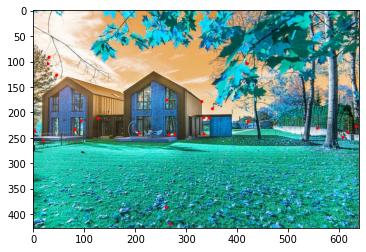

(<matplotlib.image.AxesImage at 0x7fbb980db370>, None)

In [16]:
corners = np.int0(corners)

for i in corners:
  x, y = i.ravel()
  cv2.circle(my_image, (x, y), 3, 255, -1 )
  
plt.imshow(my_image),plt.show()
